In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour_with_quiver
from visualize import surf
from visualize import contour_with_path

xmin, xmax, xstep = -4.0, 4.0, .25
ymin, ymax, ystep = -4.0, 4.0, .25
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

f = lambda x, y : (x-2)**2 + (y-2)**2
z = f(x,y)
minima = np.array([2., 2.])
f(*minima)

0.0

[2. 2.] [[2.]
 [2.]]


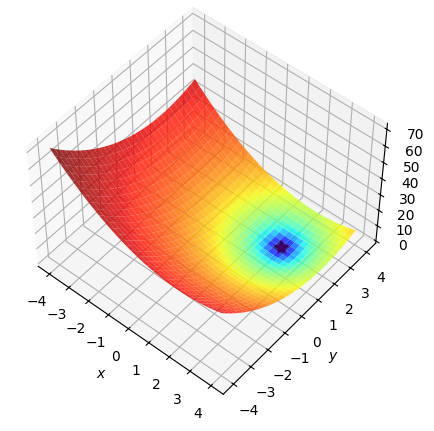

In [2]:
minima_ = minima.reshape(-1,1)
print(minima, minima_)
surf(f,x,y,minima=minima_)

/home/hojoon/Developer/python-practice/visualize.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


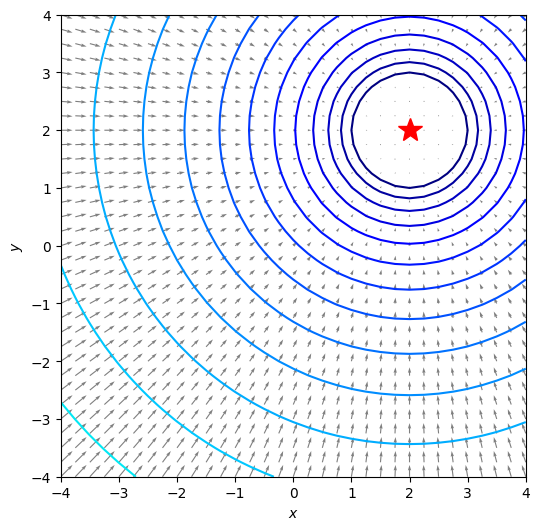

In [3]:
grad_f_x = lambda x,y : 2*(x-2)
grad_f_y = lambda x,y : 2*(y-2)

contour_with_quiver(f,x,y,grad_f_x, grad_f_y, minima=minima_)

In [4]:
def steepest_descent_twod(func, gradx,grady,x0,Maxiter=10,learning_rate=0.25,verbose=True):
    paths=[x0]
    fval_paths = [f(x0[0],x0[1])]
    for i in range(Maxiter):
        grad=np.array([grad_f_x(*x0),grad_f_y(*x0)])
        x1=x0 - learning_rate * grad
        fval = f(*x1)
        if verbose:
            print(i, x1, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return (x0,fval,paths,fval_paths)

/home/hojoon/Developer/python-practice/visualize.py:41: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


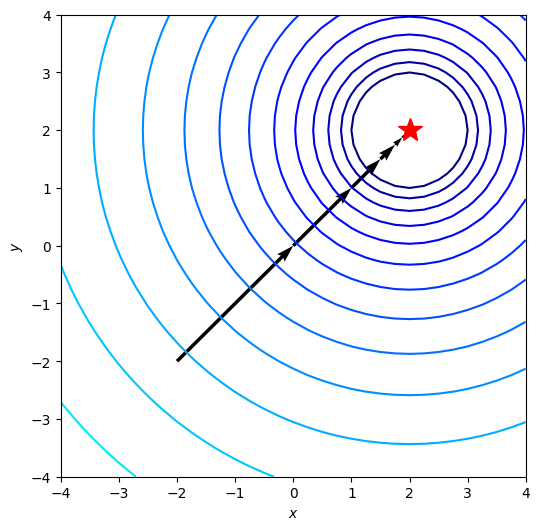

In [5]:
x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)
contour_with_path(f,x,y,paths,minima=np.array([[2],[2]]))

In [6]:
import numpy as np
import matplotlib.pylab as plt

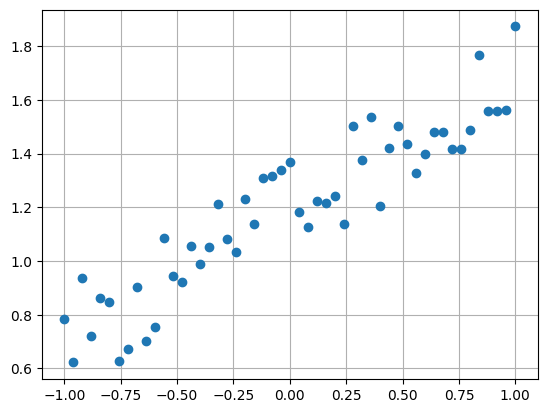

In [7]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x : 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [8]:
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

In [9]:
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0

    for i in range(len(x_set)):
        val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i])**2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

In [10]:
def generate_batches(batch_size, features, labels):
    assert len(features) == len(labels)
    outout_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

In [11]:
# GD
batch_size = 5
lr = 0.25
MaxEpochs = 51

# Momentum
alpha = .9

# Adagrad
epsilon = lr
delta = 1e-7

rho = 0.9

In [12]:
w0 = np.array([4.0, -1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.45591346 1.19374286] 0.006759415655564854
20 [0.45570277 1.19374398] 0.006760230382604165
30 [0.45570276 1.19374398] 0.006760230437009276
40 [0.45570276 1.19374398] 0.006760230437012875
50 [0.45570276 1.19374398] 0.006760230437012875


# Momentum

In [13]:
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.48856073 1.16641676] 0.007226364998800037
20 [0.43037338 1.16885031] 0.007311377128516079
30 [0.42941847 1.16879671] 0.0073250564323010985
40 [0.42940312 1.16879574] 0.007325281849645368
50 [0.42940288 1.16879572] 0.007325285451098939


/tmp/ipykernel_44313/1015664340.py:13: UserWarning: The following kwargs were not used by contour: 'camp'
  ax.contour(W0, W1, LOSSW, camp=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))


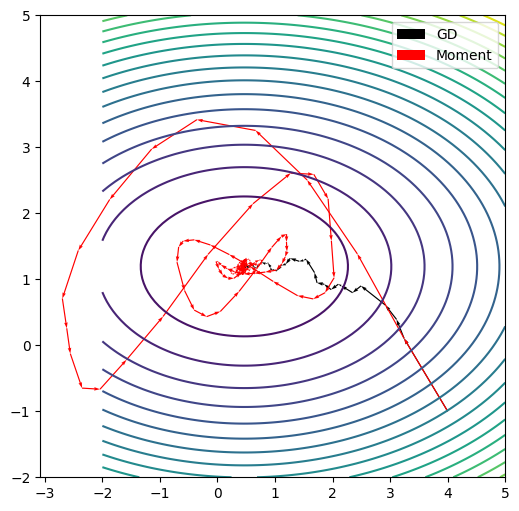

In [14]:
W0 = np.linspace(-2, 5, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0, W1)
LOSSW = W0 * 0

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))

ax.contour(W0, W1, LOSSW, camp=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, : -1], paths[1, :-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='k')
paths=path_mm
paths=np.array(np.matrix(paths).T)
ax.quiver(paths[0, : -1], paths[1, :-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(['GD','Moment'])
plt.show()

# Adagrad

In [15]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)

path_adagrad = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagrad.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = -epsilon/(delta + np.sqrt(r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [1.27385371 1.12849596] 0.12179548968130172
20 [0.72069156 1.19774907] 0.01789841663764951
30 [0.54722034 1.19801072] 0.007857912015014507
40 [0.49143959 1.19677107] 0.006842667908195538
50 [0.47343446 1.19628963] 0.006745460179042755


/tmp/ipykernel_44313/1593379648.py:13: UserWarning: The following kwargs were not used by contour: 'camp'
  ax.contour(W0, W1, LOSSW, camp=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))


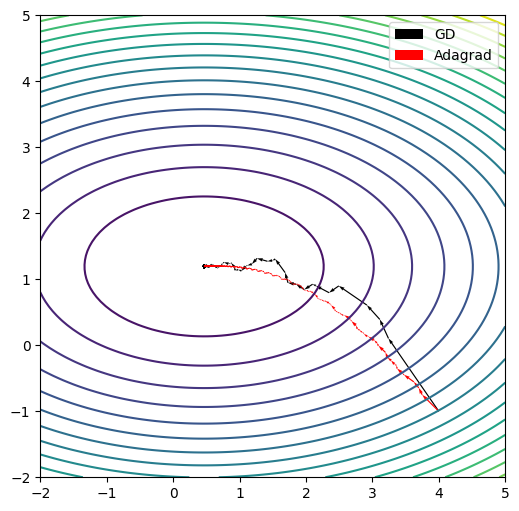

In [16]:
W0 = np.linspace(-2, 5, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0, W1)
LOSSW = W0 * 0

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))

ax.contour(W0, W1, LOSSW, camp=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, : -1], paths[1, :-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='k')

paths=path_adagrad
paths=np.array(np.matrix(paths).T)
ax.quiver(paths[0, : -1], paths[1, :-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(['GD','Adagrad'])
plt.show()

# RMSprop

In [17]:
# RMSprop

w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)

path_rmsprop = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho*r+(1-rho)*grad*grad
        delw = -epsilon/(delta + np.sqrt(delta+r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.41320441 1.24992765] 0.008747685972512334
20 [0.41300513 1.2499151 ] 0.008750718280176886
30 [0.41300513 1.2499151 ] 0.00875071828739848
40 [0.41300513 1.2499151 ] 0.008750718287398502
50 [0.41300513 1.2499151 ] 0.008750718287398502


/tmp/ipykernel_44313/1683191910.py:13: UserWarning: The following kwargs were not used by contour: 'camp'
  ax.contour(W0, W1, LOSSW, camp=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))


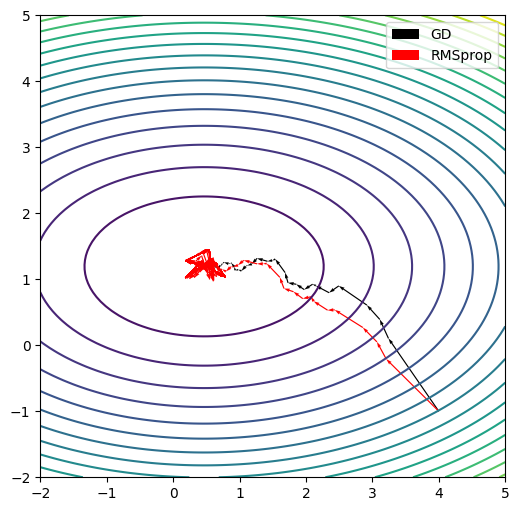

In [18]:
W0 = np.linspace(-2, 5, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0, W1)
LOSSW = W0 * 0

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))

ax.contour(W0, W1, LOSSW, camp=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, : -1], paths[1, :-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='k')

paths=path_rmsprop
paths=np.array(np.matrix(paths).T)
ax.quiver(paths[0, : -1], paths[1, :-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(['GD','RMSprop'])
plt.show()

# Adam

In [19]:
MaxEpochs = 51
batch_size = 10
epsilon = 0.1
delta = 1e-6

delta_adam = 1e-8
rho1 = 0.9
rho2 = 0.999

rho = 0.9

In [20]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
s = np.zeros_like(w0)

path_adam = []
t = 0
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        t += 1
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        s = rho1*s +(1. - rho1)*grad
        r = rho2*r+(1. - rho2)*grad*grad
        shat = s/(1 - rho ** t)
        rhat = r/(1 - rho2 ** t)
        delw = -epsilon/(delta_adam + np.sqrt(rhat))*shat
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.50374253 1.27270463] 0.009991311458367463
20 [0.46748373 1.20122063] 0.00675684656345232
30 [0.46421774 1.1973704 ] 0.006741555264123772
40 [0.46458265 1.19746515] 0.0067414585756450235
50 [0.46452398 1.19749213] 0.006741575079068978


/tmp/ipykernel_44313/3885421156.py:13: UserWarning: The following kwargs were not used by contour: 'camp'
  ax.contour(W0, W1, LOSSW, camp=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))


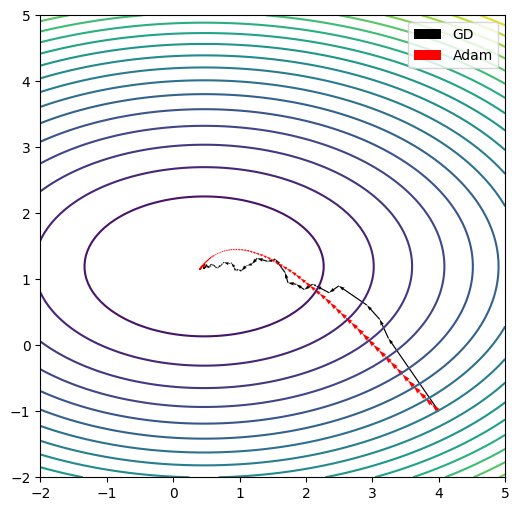

In [21]:
W0 = np.linspace(-2, 5, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0, W1)
LOSSW = W0 * 0

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))

ax.contour(W0, W1, LOSSW, camp=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, : -1], paths[1, :-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='k')

paths=path_adam
paths=np.array(np.matrix(paths).T)
ax.quiver(paths[0, : -1], paths[1, :-1], paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(['GD','Adam'])
plt.show()